explore dataset and make a few visuals  
look for q that can be answered with an experiment  
* Analysis that highlights your experimental hypothesis.  
* A rollout plan showing how you would implement and rollout the experiment  
* An evaluation plan showing what constitutes success in this experiment  

target 3-5 pages  



Using 
https://www.kaggle.com/chicago/chicago-red-light-and-speed-camera-data

In [2]:
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
import os
os.getcwd()

'C:\\Users\\Chris\\Documents\\thinkful\\thinkful_notes'

In [4]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = r"C:\Users\Chris\Documents\thinkful\data_sets\chicago-red-light-and-speed-camera-data.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip:    #readmode
    zip.printdir() 
    zip.extractall(path=r'C:\Users\Chris\Documents\thinkful\data_sets\speed_cam') 

File Name                                             Modified             Size
socrata_metadata_speed-camera-violations.json  2019-06-06 22:50:52        17371
socrata_metadata_red-light-camera-locations.json 2019-06-06 22:50:52        10604
speed-camera-locations.csv                     2019-06-06 22:50:52        42073
red-light-camera-locations.csv                 2019-06-06 22:50:52        34534
speed-camera-violations.csv                    2019-06-06 22:50:52     53258913
red-light-camera-violations.csv                2019-06-06 22:50:54    141887527
socrata_metadata_speed-camera-locations.json   2019-06-06 22:50:58        10424
socrata_metadata_red-light-camera-violations.json 2019-06-06 22:50:58        19172


In [5]:
df = pd.read_csv(r'C:\Users\Chris\Documents\thinkful\data_sets\speed_cam\speed-camera-violations.csv')

In [6]:
df.tail()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
188620,7518 S VINCENNES,CHI063,2014-07-01T00:00:00.000,124,1.175649e+06,1.855003e+06,41.757497,-87.631833,"{'longitude': '-87.63183332832696', 'latitude'...",17.0,21554.0,67.0,495.0,32.0
188621,7738 S WESTERN,CHI065,2014-07-01T00:00:00.000,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188622,7739 S WESTERN,CHI064,2014-07-01T00:00:00.000,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188623,7826 S PULASKI,CHI072,2014-07-01T00:00:00.000,27,1.151041e+06,1.852282e+06,41.750546,-87.722093,"{'longitude': '-87.72209265589272', 'latitude'...",23.0,4300.0,69.0,571.0,30.0
188624,7833 S PULASKI,CHI071,2014-07-01T00:00:00.000,120,1.151122e+06,1.852224e+06,41.750385,-87.721795,"{'longitude': '-87.72179453872008', 'latitude'...",6.0,4300.0,69.0,571.0,30.0


In [7]:
#renmae to simpler names
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [8]:
#remove nulls
df.dropna(axis=0, subset=['zip_codes'], inplace=True)

In [9]:
df.dtypes

address                        object
camera_id                      object
violation_date                 object
violations                      int64
x_coordinate                  float64
y_coordinate                  float64
latitude                      float64
longitude                     float64
location                       object
historical_wards_2003-2015    float64
zip_codes                     float64
community_areas               float64
census_tracts                 float64
wards                         float64
dtype: object

In [10]:
#get column of just dates in date format
df['violation_dt'] = df['violation_date'].apply(lambda x: x[:10])
df['violation_dt'] = pd.to_datetime(df['violation_dt'])

In [11]:
#change wards to ints
df.wards = df.wards.astype(int)

In [12]:
df.head()

,address,camera_id,violation_date,violations,x_coordinate,y_coordinate,latitude,longitude,location,historical_wards_2003-2015,zip_codes,community_areas,census_tracts,wards,violation_dt
0,10318 S INDIANAPOLIS,CHI120,2019-05-23T00:00:00.000,88,1.203645e+06,1.837056e+06,41.707577,-87.529848,"{'longitude': '-87.52984826112849', 'latitude'...",47.0,21202.0,49.0,705.0,47,2019-05-23
1,1110 S PULASKI RD,CHI163,2019-05-23T00:00:00.000,21,1.149841e+06,1.894931e+06,41.867603,-87.725383,"{'longitude': '-87.7253827433152', 'latitude':...",36.0,21572.0,30.0,98.0,14,2019-05-23
3,11144 S VINCENNES,CHI023,2019-05-23T00:00:00.000,26,1.166994e+06,1.830711e+06,41.691025,-87.664248,"{'longitude': '-87.6642476900556', 'latitude':...",33.0,22212.0,74.0,378.0,42,2019-05-23
4,11153 S VINCENNES,CHI022,2019-05-23T00:00:00.000,17,1.167029e+06,1.830594e+06,41.690702,-87.664122,"{'longitude': '-87.66412238501842', 'latitude'...",45.0,22212.0,74.0,378.0,22,2019-05-23
5,1117 S PULASKI RD,CHI162,2019-05-23T00:00:00.000,26,1.149923e+06,1.894858e+06,41.867402,-87.725084,"{'longitude': '-87.72508368792016', 'latitude'...",36.0,21572.0,30.0,98.0,14,2019-05-23


In [13]:
by_date_df = df.groupby('violation_dt')['violations', 'violation_dt'].agg({sum})#.rename(columns={'sum_of_violation'}) 

In [14]:
by_date_df

,violations
,sum
violation_dt,
2014-07-01,4752
2014-07-02,3877
2014-07-03,4719
2014-07-04,3517
2014-07-05,3357
2014-07-06,3452
2014-07-07,4549
2014-07-08,4496


c:\users\chris\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


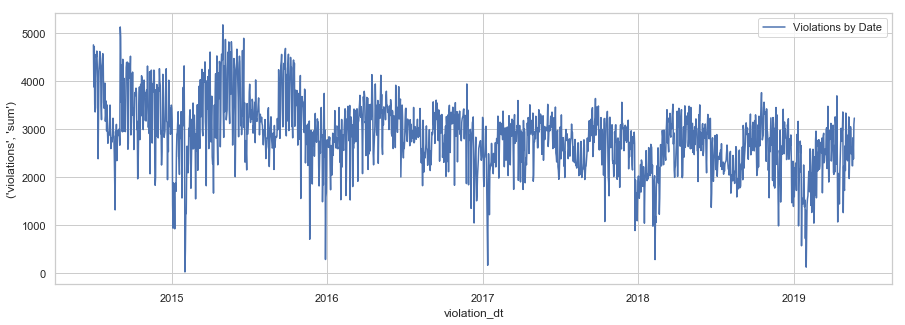

In [15]:
#plot
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")
fig_f, ax_f = plt.subplots()
#plot by date
ax_f = sns.lineplot(x=by_date_df.index, y=by_date_df.iloc[:,0], label='Violations by Date', palette='muted')

In [16]:
#by day of week
by_day_df = df['violation_dt'].da

AttributeError: 'Series' object has no attribute 'da'

In [17]:
#by ward aggregates
ward_df = df.groupby(['wards'])['violations'].agg([sum, 'count', np.mean, np.std])
ward_df.columns = ['violations', 'cameras', 'mean_vio_per_cam', 'vio_std']
ward_df.sort_values(axis=0, by='violations', inplace=True, ascending=False)
ward_df.head()


,violations,cameras,mean_vio_per_cam,vio_std
wards,,,,
38,622837,7735,80.521913,78.503492
14,325309,6048,53.787864,45.060393
4,309846,6819,45.438627,44.494447
43,282628,5106,55.352135,69.310013
47,243581,6726,36.214838,44.386234


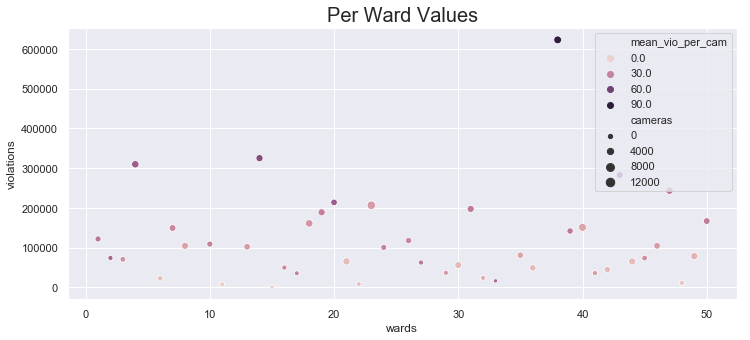

In [18]:
#plot
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("darkgrid")
#fig_w, ax_w = plt.subplots()
ax_w = sns.scatterplot(data=ward_df, x=ward_df.index, y='violations', hue='mean_vio_per_cam', 
                    size='cameras')
ax_w.legend(loc='upper right')
ax_w.set_title('Per Ward Values', size=20); 

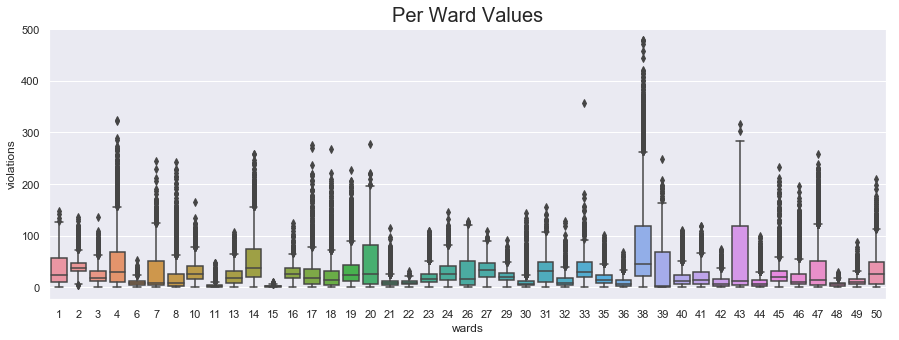

In [21]:
#boxplot
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("darkgrid")
#fig_w, ax_w = plt.subplots()
ax_w = sns.boxplot(x='wards', y='violations', data=df)
#ax_w.legend(loc='upper right')
ax_w.set_title('Per Ward Values', size=20);

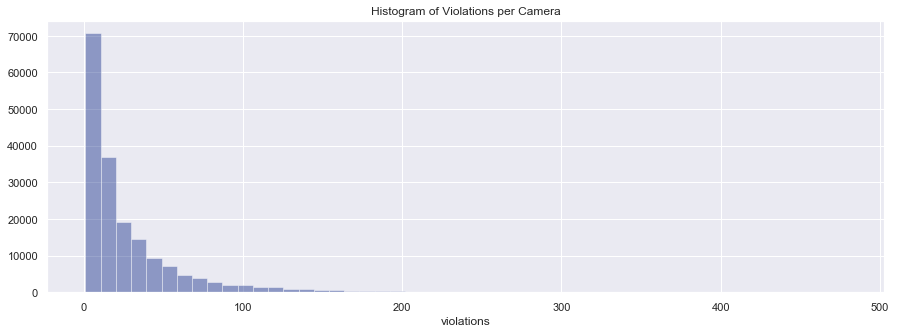

In [20]:
#histogram of all frequency
sns.set_palette('dark')
ax_h = sns.distplot(df.violations, kde=False)
ax_h.set_title("Histogram of Violations per Camera");

In [22]:
df.violations.size

181451

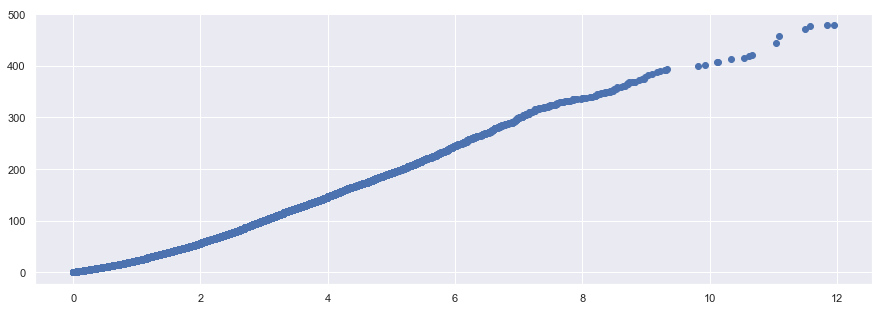

In [45]:
##qq plot? exponential dist?
xp_rand = np.random.exponential(size=df.violations.size)
vios_sort = df.violations.sort_values(ascending=True).values
xp_rand = np.sort(xp_rand)
#sns.scatterplot(x=xp_rand, y=df.violations);
xp_rand
plt.plot(xp_rand, vios_sort, "o") 
plt.show() 


### Hypothesis:
My Hypothesis is that 
measuring traffic incidents near cameras. Do high violation locations just correlate to just high traffic, or places where there are bad driving location? select several bins of equivalent 'violations count' intersections, and look for accident reports on that block. accidents normally distributed?

### Analysis that highlights your experimental hypothesis.


### A rollout plan showing how you would implement and rollout the experiment


### An evaluation plan showing what constitutes success in this experiment

#### Primary success metric

#### Secondary metrics